### NAMA : M RESTU AJI (09011281722071 SK5A)

## IMPORT PACKAGES
Berikut ini adalah paket-paket yang digunakan antara lain 

In [1]:
#main library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np

from keras.optimizers import Adam
#sklearn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout
from keras.activations import relu
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## IMPORT PACKAGES
Berikut ini adalah paket-paket yang digunakan antara lain 

https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+

In [2]:
data = pd.read_csv('C:/Users/User/Downloads/Data_for_UCI_named.csv')

In [3]:
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


value_counts() fungsi mengembalikan objek yang berisi jumlah nilai unik. Objek yang dihasilkan akan berurutan sehingga elemen pertama adalah elemen yang paling sering terjadi

In [4]:
data.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [5]:
data.shape

(10000, 14)

In [7]:
enc = LabelEncoder()
df= data.apply(enc.fit_transform)
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2588,2715,8295,9769,5055,8115,4950,1846,6320,8521,8815,9558,8392,1
1,9267,4634,2681,915,9610,399,848,4966,3825,8551,5390,7702,3222,0
2,8917,8787,2680,752,3297,5283,4818,7196,1189,7544,8309,630,3874,1
3,227,7546,4196,1937,6036,6483,407,6684,4170,9755,9256,3291,6053,1
4,2772,7482,4677,9850,3879,5829,1026,9637,7864,4267,6388,8114,7930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2558,9460,1975,5987,2996,8946,3672,5091,5807,7680,8036,5877,5577,1
9996,3044,815,2584,6731,7749,2242,6983,1777,4758,5444,2482,3327,1643,0
9997,1962,2465,8711,535,7574,4128,7040,164,4608,9857,1045,1010,1187,0
9998,9612,3678,2375,7706,522,6891,9000,7343,3318,5658,8832,8088,6917,1


In [8]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

## FEATURE NORMALIZATION
Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [11]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(X)
feature_scaled.shape

(10000, 13)

In [12]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.000000
mean,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,0.638000
std,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,2886.89568,0.480603
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000
25%,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,2499.75000,0.000000
50%,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,4999.50000,1.000000
75%,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,7499.25000,1.000000
max,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,9999.00000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
tau1     10000 non-null int64
tau2     10000 non-null int64
tau3     10000 non-null int64
tau4     10000 non-null int64
p1       10000 non-null int64
p2       10000 non-null int64
p3       10000 non-null int64
p4       10000 non-null int64
g1       10000 non-null int64
g2       10000 non-null int64
g3       10000 non-null int64
g4       10000 non-null int64
stab     10000 non-null int64
stabf    10000 non-null int32
dtypes: int32(1), int64(13)
memory usage: 1.0 MB


Bagi data ke Fitur dan Label

In [14]:
x= np.array(df.ix[:, 0:13])
y = np.array(df.ix[:, 13])

Text(0.5, 0, 'stabf')

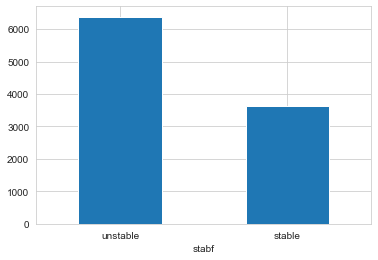

In [15]:
labels = ['unstable','stable']
classes = pd.value_counts(df['stabf'], sort = True)
classes.plot(kind = 'bar', rot=0)

plt.xticks(range(2), labels)
plt.xlabel("stabf")


## SEQUENTIAL MODEL
Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2)

In [24]:
model = Sequential()
model.add(Dense(units= 50, input_dim =13 , activation='relu'))
model.add(Dense(units= 50, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [25]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, 
                         epochs=100)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 44us/step - loss: 0.3214 - accuracy: 0.9919 - val_loss: 1.6635 - val_accuracy: 0.9810
Epoch 2/100
8000/8000 [==============================] - 0s 43us/step - loss: 0.2655 - accuracy: 0.9936 - val_loss: 0.7961 - val_accuracy: 0.9870
Epoch 3/100
8000/8000 [==============================] - 0s 44us/step - loss: 0.1921 - accuracy: 0.9939 - val_loss: 1.0117 - val_accuracy: 0.9840
Epoch 4/100
8000/8000 [==============================] - 0s 44us/step - loss: 0.5135 - accuracy: 0.9910 - val_loss: 0.9539 - val_accuracy: 0.9820
Epoch 5/100
8000/8000 [==============================] - 0s 49us/step - loss: 0.2721 - accuracy: 0.9931 - val_loss: 0.9454 - val_accuracy: 0.9840
Epoch 6/100
8000/8000 [==============================] - ETA: 0s - loss: 0.4794 - accuracy: 0.99 - 0s 54us/step - loss: 0.4719 - accuracy: 0.9900 - val_loss: 0.7786 - val_accuracy: 0.9860
Epoch 7/100
8000/8000 [===========

## TESTING


In [27]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

2000/2000 [==============================] - 0s 23us/step


[0.7959785379391228, 0.9825000166893005]

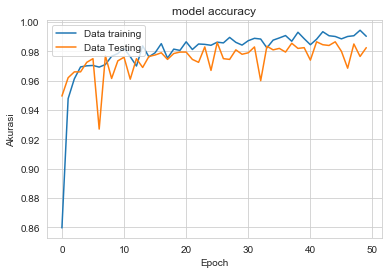

In [28]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

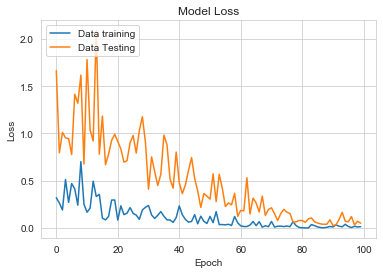

In [30]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

## CONFUSION MATRIX

In [31]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [32]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[ 704    2]
 [  22 1272]]


## PRECISSION, RECALL, F1, SENSITIVITY, DAN AKURASI


In [33]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [34]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9971671388101983
recall :  0.9696969696969697
F1 :  0.9832402234636871
sensitivity :  0.9696969696969697
akurasi :  0.988


Hasil akursai yang di dapat kan sebesar 98,8%